## Handwritten Digit Classification
----
This notebook explores the task of handwritten digit classification using TensorFlow and the MNIST dataset.

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print("Training Data shape : ", X_train.shape)
print("Testing Data shape : ", X_test.shape)

Training Data shape :  (60000, 28, 28)
Testing Data shape :  (10000, 28, 28)


<Figure size 200x600 with 0 Axes>

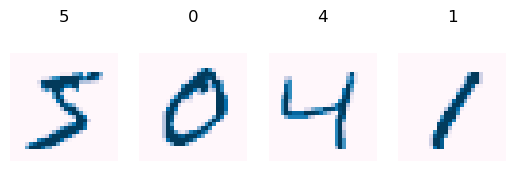

In [4]:
# Visualize the data

plt.figure(figsize=(2, 6))

fig, ax = plt.subplots(1, 4)

for i in range(4):
  ax[i].matshow(X_train[i], cmap = mpl.colormaps['PuBu'])
  ax[i].set_title(y_train[i])
  ax[i].axis('off')

plt.show()

In [5]:
# Normalization

X_train = X_train/255
X_test = X_test/255

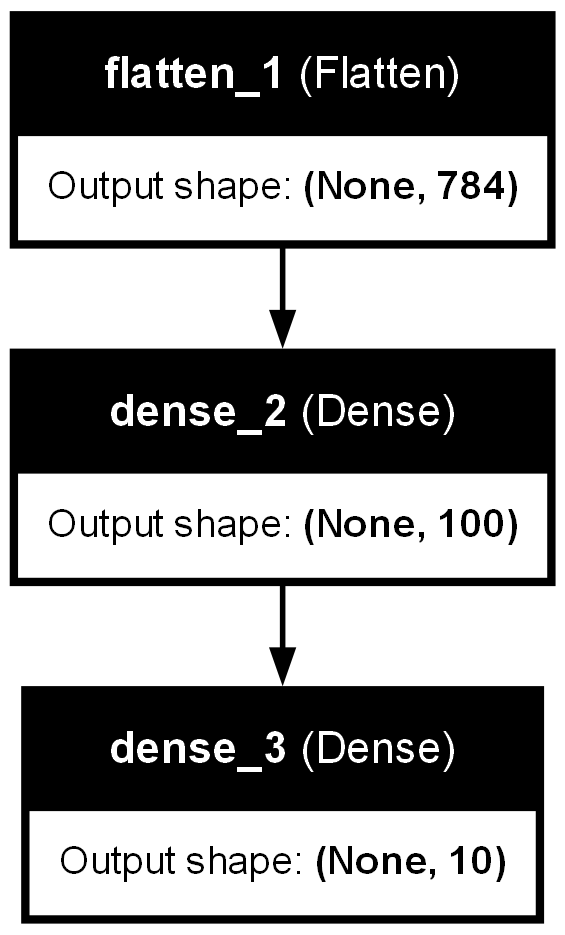

In [7]:
model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [8]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8713 - loss: 0.4557
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9609 - loss: 0.1313
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9729 - loss: 0.0914
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9814 - loss: 0.0642
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9836 - loss: 0.0517
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9879 - loss: 0.0392
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9904 - loss: 0.0317
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9920 - loss: 0.0264
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9928 - loss: 0.0233
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9954 - loss: 0.0178


In [9]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9687 - loss: 0.1065


[0.09052205085754395, 0.9731000065803528]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(0.5, 1.0, 'Predicted Value : 7')

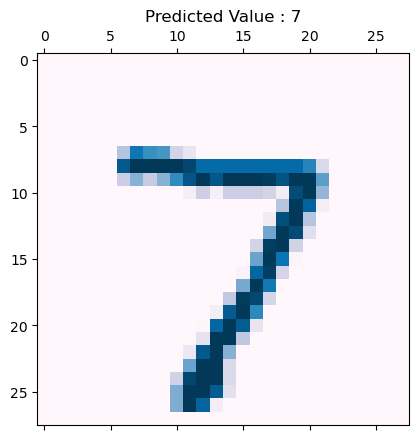

In [10]:
y_pred = model.predict(X_test)

plt.matshow(X_test[0], cmap = mpl.colormaps['PuBu'])
plt.title(f"Predicted Value : {np.argmax(y_pred[0])}")

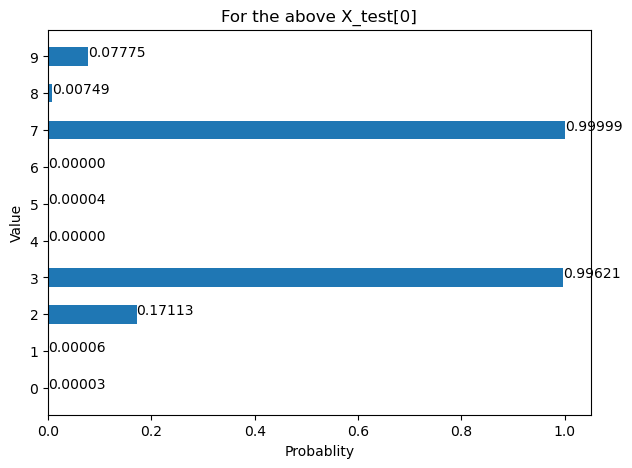

In [11]:
plt.figure(figsize=(7, 5))
y_labels = [str(i) for i in range(10)]
plt.barh(y_labels, y_pred[0], height = 0.5)

for index, value in enumerate(y_pred[0]):
    plt.text(value, index, f'{value:.5f}')

plt.title('For the above X_test[0]')

plt.xlabel("Probablity")
plt.ylabel("Value")
plt.show()

In [12]:
# confusion matrix

y_actual_pred = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_actual_pred)

Text(58.222222222222214, 0.5, 'Truth')

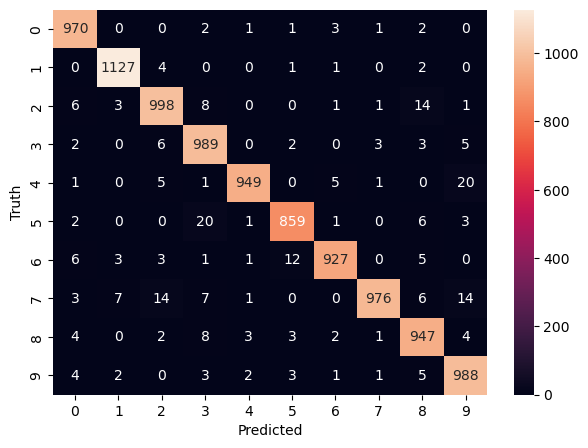

In [13]:
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')